### Objective:
Patient category prediction(Healthy or Unhealthy).

**Dataset:** 
The data set contains laboratory values of blood donors and Hepatitis C patients and demographic values like age. The data was obtained from UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/HCV+data

**By:** Sanket Sharma, ur.sanketsharma@gmail.com


In [1]:
#Import Necessary Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



### Step 1: Load Data

In [2]:
df = pd.read_csv("HepatitisCdata.csv")



### Step 2: Summarize Dataset

In [3]:
# lets look top few rows
df.head()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [4]:

# Lets look few bottom rows
df.tail()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
610,611,3=Cirrhosis,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,612,3=Cirrhosis,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,613,3=Cirrhosis,64,f,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,614,3=Cirrhosis,46,f,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0
614,615,3=Cirrhosis,59,f,36.0,NaN,100.0,80.0,12.0,9.07,5.30,67.0,34.0,68.0


In [4]:
#lets droped the column 0 as it looks like srial nos.
df = df.drop(labels ="Unnamed: 0", axis=1)

In [5]:
# lets gather some information about datastructures
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  615 non-null    object 
 1   Age       615 non-null    int64  
 2   Sex       615 non-null    object 
 3   ALB       614 non-null    float64
 4   ALP       597 non-null    float64
 5   ALT       614 non-null    float64
 6   AST       615 non-null    float64
 7   BIL       615 non-null    float64
 8   CHE       615 non-null    float64
 9   CHOL      605 non-null    float64
 10  CREA      615 non-null    float64
 11  GGT       615 non-null    float64
 12  PROT      614 non-null    float64
dtypes: float64(10), int64(1), object(2)
memory usage: 62.6+ KB


 We can see that **Category** and **Sex** column holds categorical data and all other variables have numerical values
 
 Columns **ALB**, **ALP**, **ALT**, **CHOL**, and **PROT** have few records missing, now we can either fill those records or drop those rows having missing data. but we cant fill assumed values for medical data so lets drop them

In [6]:
#lets drop null values as we cant fill null values wrongly for medical data
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 589 entries, 0 to 612
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  589 non-null    object 
 1   Age       589 non-null    int64  
 2   Sex       589 non-null    object 
 3   ALB       589 non-null    float64
 4   ALP       589 non-null    float64
 5   ALT       589 non-null    float64
 6   AST       589 non-null    float64
 7   BIL       589 non-null    float64
 8   CHE       589 non-null    float64
 9   CHOL      589 non-null    float64
 10  CREA      589 non-null    float64
 11  GGT       589 non-null    float64
 12  PROT      589 non-null    float64
dtypes: float64(10), int64(1), object(2)
memory usage: 64.4+ KB


In [7]:
# lets see how many category are there 
df["Category"].unique()

array(['0=Blood Donor', '0s=suspect Blood Donor', '1=Hepatitis',
       '2=Fibrosis', '3=Cirrhosis'], dtype=object)

In [24]:
# Though there are many categories, we are breaking it into binary: healthy and unhealthy.
df['Category'].loc[df['Category'].isin(["1=Hepatitis","2=Fibrosis", "3=Cirrhosis"])] = 1
df['Category'].loc[df['Category'].isin(["0=Blood Donor", "0s=suspect Blood Donor"])] = 0
df = df.astype({'Category': 'int'})

In [9]:
# lets see how many records falls in each category
df["Category"].value_counts()

0    533
1     56
Name: Category, dtype: int64

 it means there are 533 healthy people and 56 unhealty

In [10]:
# lets group by sex
df.groupby(["Sex", "Category"]).size()


Sex  Category
f    0           210
     1            16
m    0           323
     1            40
dtype: int64

There are 210 healthy and 16 unhealthy females, while 323 healthy and 40 unhealthy males

In [11]:
# lets look at Statical attributes of dataset
df.describe()

,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
count,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000
mean,47.417657,41.624278,68.123090,26.575382,33.772835,11.018166,8.203633,5.391341,81.669100,38.198472,71.890153
std,9.931334,5.761794,25.921072,20.863120,32.866871,17.406572,2.191073,1.128954,50.696991,54.302407,5.348883
min,23.000000,14.900000,11.300000,0.900000,10.600000,0.800000,1.420000,1.430000,8.000000,4.500000,44.800000
25%,39.000000,38.800000,52.500000,16.400000,21.500000,5.200000,6.930000,4.620000,68.000000,15.600000,69.300000
50%,47.000000,41.900000,66.200000,22.700000,25.700000,7.100000,8.260000,5.310000,77.000000,22.800000,72.100000
75%,54.000000,45.100000,79.900000,31.900000,31.700000,11.000000,9.570000,6.080000,89.000000,37.600000,75.200000
max,77.000000,82.200000,416.600000,325.300000,324.000000,209.000000,16.410000,9.670000,1079.100000,650.900000,86.500000



### Step 3: Visualise Data

   **Univariate plot**


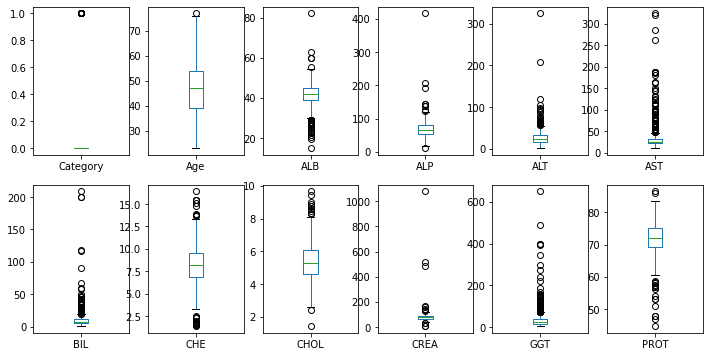

In [12]:
# Box and whisker plot
df.plot(kind="box", subplots = True, layout=(2,6), figsize=(12,6))
plt.show()

 We can see that there are lot of outliers in most of the input variables, but I'm not going to do anything about them beacause:
 - I'm not into medical field and I dont have enough knowledege abot most of the features and what they represent.
 - Blood analysis values for each feature can differ hugely between healthy and unhealthy individual and the outliers in this DataFrame may contain some important information for the models to come in order to predict the disease.
 - This dataset is very small, only 589 records are there, That is very few and most of them refer to healthy people so I want to exploit each and every single one of them.

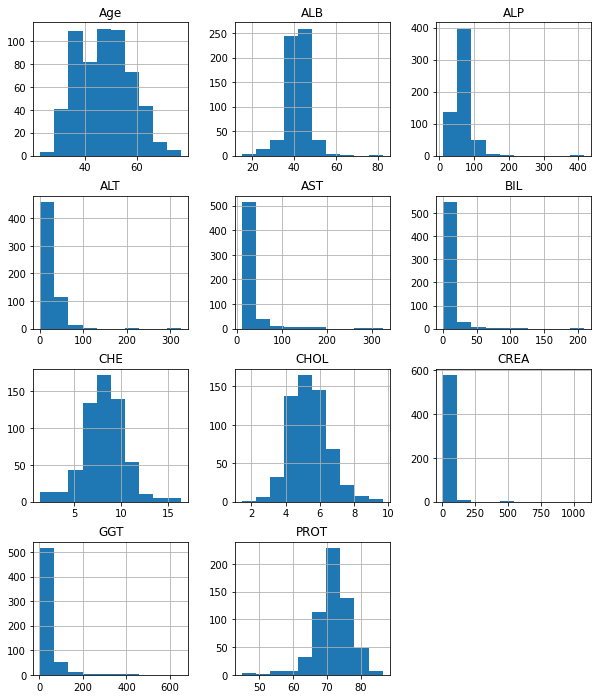

In [13]:
#Histogram
df.hist(layout=(4,3), figsize=(10,12))
plt.show()

We can see that few variables are following nearly normal distribution 

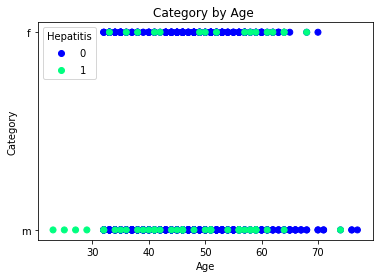

In [14]:
# Let's plot category against age , group by sex
x = df['Age']
y = df["Category"]
scatter = plt.scatter(x, df["Sex"], c=y, cmap='winter')
plt.title('Category by Age ')
plt.xlabel('Age')
plt.ylabel('Category')
plt.legend(*scatter.legend_elements(), title='Hepatitis')
plt.show()

By above graph be can see that all males below the age 30 are positive. The model used will likely put too much weight on this coincidence due to such strong correlation. But we are not droping males below the age 30 because we have very less records.

In [22]:
# We also need to use numerical data for the sex column, lets encode
df['Sex'].loc[df['Sex']=='m']=1
df['Sex'].loc[df['Sex']=='f']=0
df = df.astype({'Sex': 'int'})

/home/sanket/snap/jupyter/common/lib/python3.7/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [28]:
# input variable
X = df.drop(labels="Category", axis=1)

# Output variable
y = df["Category"]


### Step 5: Spliting into training and testing sets

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)





### Step6: Evaluating different Models
We dont know which calssification Model will perform best for this problem, So we will be evaluating below models using GridSearchCV:
1.DecisionTreeClassifier 2.RandomForest 3.LogisticRegression 4.GaussianNB 5.MultinomialNB 6.SVM

In [30]:
# lets import necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

In [31]:
# Lets create a dictionary for Model parameters

model_param = {'DecisionTreeClassifier':{'model': DecisionTreeClassifier(), 'param': {'criterion': ['gini','entropy']}},
              'Randomforest': {'model': RandomForestClassifier(), 'param': {'n_estimators':[1,5,10,15,20,25,30,40,50,60,80,100]}},
              'LogisticRegression':{'model': LogisticRegression(solver='liblinear',multi_class='auto'),'param': {'C': [1,5,10,15,20]}},
              'GaussianNB':{'model': GaussianNB(), 'param': {}},
              'MultinomialNB':{'model': MultinomialNB(), 'param': {}},
               'SVM':{'model': SVC(gamma='auto'), 'param': {'C': [0.001,0.1,1],'kernel':['rbf', 'linear']}}
              }

In [35]:
# Applying GridSearchCV to evaluate models

from sklearn.model_selection import GridSearchCV

scores = []

for model_name, mp in model_param.items():
    clf = GridSearchCV(mp['model'], mp['param'], cv=5, return_train_score=None)
    clf.fit(X,y)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

In [36]:
scores

[{'model': 'DecisionTreeClassifier',
  'best_score': 0.9728234101115458,
  'best_params': {'criterion': 'gini'}},
 {'model': 'Randomforest',
  'best_score': 0.9779371287845864,
  'best_params': {'n_estimators': 25}},
 {'model': 'LogisticRegression',
  'best_score': 0.9812979863827321,
  'best_params': {'C': 1}},
 {'model': 'GaussianNB', 'best_score': 0.9405475880052151, 'best_params': {}},
 {'model': 'MultinomialNB',
  'best_score': 0.9609445168767202,
  'best_params': {}},
 {'model': 'SVM',
  'best_score': 0.989787049109083,
  'best_params': {'C': 0.1, 'kernel': 'linear'}}]

In [37]:
# lets see scores as a dataframe
score1 = pd.DataFrame(scores)
score1.sort_values(by=['best_score'], inplace = True, ascending=False)
score1

,model,best_score,best_params
5,SVM,0.989787,"{'C': 0.1, 'kernel': 'linear'}"
2,LogisticRegression,0.981298,{'C': 1}
1,Randomforest,0.977937,{'n_estimators': 25}
0,DecisionTreeClassifier,0.972823,{'criterion': 'gini'}
4,MultinomialNB,0.960945,{}
3,GaussianNB,0.940548,{}



Here we can See that SVM is giving best results while parameters are 'C':0.1, 'kernel':'linear', We will be using SVM model


### Step 7: Applying best model on Training Set

In [39]:
# Apply random forest
model = SVC(C=0.1, kernel='linear')
model.fit(X_train, y_train)

# make predictions
predictions = model.predict(X_test)

In [40]:
# lets create confusion matrix to compare results
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)
cm

array([[108,   0],
       [  1,   9]])

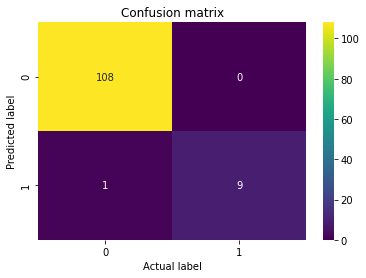

In [41]:
# Lets plot confusion matrix 
sns.heatmap(cm, annot=True, cmap="viridis" ,fmt='g')
plt.title('Confusion matrix')
plt.xlabel('Actual label')
plt.ylabel('Predicted label')
plt.show()

We can see that there are 108 True-Negative predictions, 0 False-Negative prediction, 1 False-Positive prediction and 9 True-Positive predictions. it means our model is actually predicting well

In [43]:
# lets calculate the classification accuracy 
#classification accuracy = correct predictions / total predictions * 100
cls_acc = (108+9)/(108++1+0+9)*100
print("Calssification Accuracy:"+str(round(cls_acc,2))+"%")
#error rate = 100- Calssification accuracy
error_rate = 100-cls_acc
print("Error Rate:"+str(round(error_rate,2))+"%")

Calssification Accuracy:99.15%
Error Rate:0.85%
